# Домашнее задание к уроку 3

## Задача: классификация изображений с рукописными буквами

In [442]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import random as python_random

from sklearn.model_selection import train_test_split

import os

import random

In [443]:
os.environ['PYTHONHASHSEED']=str(123)
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

## 1. Загрузка данных

In [444]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [445]:
X.shape, y.shape

((1404, 20, 16), (1404,))

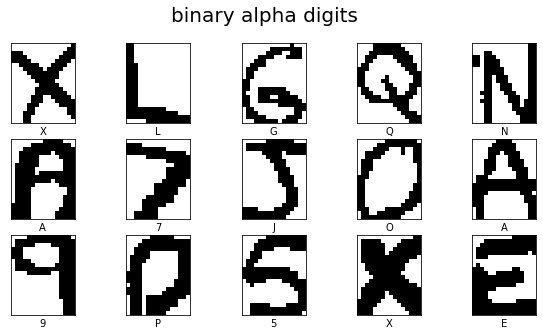

In [446]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [447]:
len(classes)

36

In [448]:
np.unique(X)

array([0, 1], dtype=uint8)

Значения пикселей в картинках - 0 или 1, поэтому нормализация не требуется.

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

Посмотрим на распределение целевой переменной.

(array([110.,  85.,  83.,  74.,  78., 112.,  84.,  84.,  89.,  79., 104.]),
 array([ 0.        ,  3.18181818,  6.36363636,  9.54545455, 12.72727273,
        15.90909091, 19.09090909, 22.27272727, 25.45454545, 28.63636364,
        31.81818182, 35.        ]),
 <BarContainer object of 11 artists>)

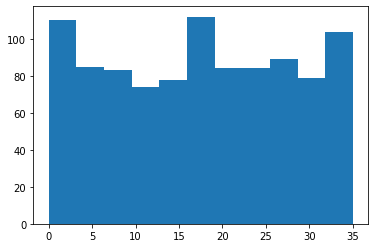

In [450]:
plt.hist(y_train, bins='auto')

Дисбаланс классов небольшой, поэтому его устранение вряд ли серьезно повлияет на точность обучения.

## 2. Создание модели и обучение нейронной сети

### 2.1. Простая модель

In [478]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [479]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
31/31 [==============================] - 0s 1ms/step - loss: 3.3128 - accuracy: 0.1415
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 2.2494 - accuracy: 0.4705
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 1.5206 - accuracy: 0.6507
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 1.1129 - accuracy: 0.7261
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.8756 - accuracy: 0.7617
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.7369 - accuracy: 0.8106
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.8462
Epoch 8/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.8686
Epoch 9/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8941
Epoch 10/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.9165


In [480]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [481]:
predictions = probability_model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [482]:
np.argmax(predictions)

99

In [483]:
print(predictions[0],
      np.argmax(predictions[0]),
      y_test[0],
      sep='\n')

[1.6174539e-06 3.2640269e-03 2.4876264e-05 2.9523832e-07 9.2123646e-01
 3.0707029e-06 4.0631294e-03 3.1267698e-06 5.0752224e-05 3.0504768e-07
 2.7350743e-05 4.6646201e-05 5.0536983e-06 8.2697926e-07 5.3931280e-06
 7.3311465e-05 1.5499899e-03 1.2241718e-05 1.2542860e-06 2.6446548e-07
 3.8251005e-02 1.7629049e-03 4.6629211e-05 4.4636410e-03 2.8807765e-06
 8.4374938e-07 2.6764176e-04 5.2092242e-04 4.5731308e-06 1.1719133e-05
 3.6348321e-03 5.5062550e-04 1.7003268e-02 2.9849911e-03 1.2333032e-04
 8.0893905e-08]
4
4


In [484]:
model.evaluate(
  X_test,
  y_test
)

14/14 [==============================] - 0s 1ms/step - loss: 1.0500 - accuracy: 0.6872


[1.049981951713562, 0.6872037649154663]

### 2.2. Модель с дополнительными слоями, как на уроке

In [494]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(256, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=0.1),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36)
])

In [511]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [512]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
31/31 - 1s - loss: 22.5593 - accuracy: 0.1354 - 1s/epoch - 33ms/step
Epoch 2/10
31/31 - 0s - loss: 9.9701 - accuracy: 0.3473 - 59ms/epoch - 2ms/step
Epoch 3/10
31/31 - 0s - loss: 4.7084 - accuracy: 0.5570 - 55ms/epoch - 2ms/step
Epoch 4/10
31/31 - 0s - loss: 2.8150 - accuracy: 0.6242 - 58ms/epoch - 2ms/step
Epoch 5/10
31/31 - 0s - loss: 2.0719 - accuracy: 0.6670 - 58ms/epoch - 2ms/step
Epoch 6/10
31/31 - 0s - loss: 1.7850 - accuracy: 0.6965 - 55ms/epoch - 2ms/step
Epoch 7/10
31/31 - 0s - loss: 1.6183 - accuracy: 0.7179 - 58ms/epoch - 2ms/step
Epoch 8/10
31/31 - 0s - loss: 1.5249 - accuracy: 0.7464 - 55ms/epoch - 2ms/step
Epoch 9/10
31/31 - 0s - loss: 1.4731 - accuracy: 0.7332 - 56ms/epoch - 2ms/step
Epoch 10/10
31/31 - 0s - loss: 1.4742 - accuracy: 0.7149 - 55ms/epoch - 2ms/step


In [513]:
model.evaluate(
  X_test,
  y_test
)

14/14 [==============================] - 0s 1ms/step - loss: 1.7565 - accuracy: 0.6090


[1.7564520835876465, 0.6090047359466553]

Результаты хуже, чем в предыдущем варианте. Возможно, это побочный эффект от использования слоев BatchNormalization, которые повышают производительность сети, но при этом приводить к более медленному обучению на старте, к нарушению независимости примеров в батче и пр.

### 2.3. Модель как в предыдущем пункте с функцией активации tanh

In [498]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(256, activation='tanh', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=0.1),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36)
])

In [507]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [508]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
31/31 - 1s - loss: 22.9318 - accuracy: 0.1640 - 503ms/epoch - 16ms/step
Epoch 2/10
31/31 - 0s - loss: 10.1303 - accuracy: 0.5285 - 57ms/epoch - 2ms/step
Epoch 3/10
31/31 - 0s - loss: 4.7682 - accuracy: 0.6640 - 54ms/epoch - 2ms/step
Epoch 4/10
31/31 - 0s - loss: 2.7173 - accuracy: 0.6843 - 55ms/epoch - 2ms/step
Epoch 5/10
31/31 - 0s - loss: 1.9573 - accuracy: 0.7067 - 54ms/epoch - 2ms/step
Epoch 6/10
31/31 - 0s - loss: 1.6352 - accuracy: 0.7363 - 56ms/epoch - 2ms/step
Epoch 7/10
31/31 - 0s - loss: 1.4807 - accuracy: 0.7536 - 54ms/epoch - 2ms/step
Epoch 8/10
31/31 - 0s - loss: 1.4011 - accuracy: 0.7739 - 54ms/epoch - 2ms/step
Epoch 9/10
31/31 - 0s - loss: 1.3470 - accuracy: 0.7505 - 55ms/epoch - 2ms/step
Epoch 10/10
31/31 - 0s - loss: 1.3091 - accuracy: 0.7505 - 54ms/epoch - 2ms/step


In [509]:
model.evaluate(
  X_test,
  y_test
)

14/14 [==============================] - 0s 1ms/step - loss: 1.6771 - accuracy: 0.5995


[1.6770907640457153, 0.599526047706604]

Результаты немного лучше, чем в предыдущем варианте, но хуже первого варианта.

### 2.4. Простая модель из первого пункта с функцией активации tanh

In [466]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [467]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
31/31 [==============================] - 0s 1ms/step - loss: 3.2997 - accuracy: 0.1568 
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 2.1846 - accuracy: 0.5336
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 1.5870 - accuracy: 0.6782
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 1.2325 - accuracy: 0.7322
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 1.0229 - accuracy: 0.7841
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.8734 - accuracy: 0.8004
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.8391
Epoch 8/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.8676
Epoch 9/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.8859
Epoch 10/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.8910


In [468]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [469]:
predictions = probability_model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [470]:
model.evaluate(
  X_test,
  y_test
)

14/14 [==============================] - 0s 1ms/step - loss: 1.0916 - accuracy: 0.6611


[1.0916417837142944, 0.6611374616622925]

Результаты хуже, чем с функцией активации Relu.

## 3. Визуализация

Еще раз применим первую модель, показавшую наилучшие результаты, и визуализируем результаты классификации.

In [471]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [472]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
31/31 [==============================] - 0s 1ms/step - loss: 3.4131 - accuracy: 0.1008
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 2.4429 - accuracy: 0.4379
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 1.6577 - accuracy: 0.6161
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 1.1886 - accuracy: 0.7261
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.9072 - accuracy: 0.7862
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.7621 - accuracy: 0.8096
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.8615
Epoch 8/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.8747
Epoch 9/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.8971
Epoch 10/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.9063


In [473]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [474]:
predictions = probability_model.predict(X_test)

14/14 [==============================] - 0s 953us/step


In [475]:
model.evaluate(
  X_test,
  y_test
)

14/14 [==============================] - 0s 1ms/step - loss: 1.0930 - accuracy: 0.6635


[1.0930020809173584, 0.6635071039199829]

In [476]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(36))
  plt.yticks([])
  thisplot = plt.bar(range(36), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

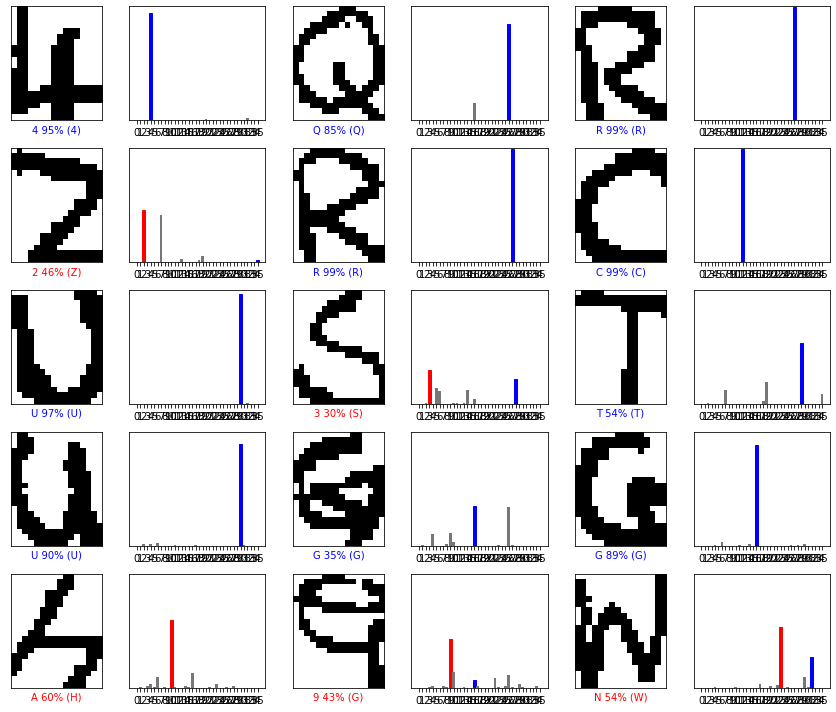

In [477]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()